In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms']) 
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
# mapping labels to 0 and 1
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [5]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
 2   label   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [7]:
X = docs.sms
y = docs.label

## Converting non categorical text data

### Bag of Words(BoW) Model
We cannot pass text directly to train our models, thus we need to convert it into numbers, which the machine can understand and can perform the required modeling on it. <b>The Bag of Words(BoW) model</b> is a fundamental(and old) way of doing this.

It converts a sentence or a paragraph into a bag of words with no meaning. It converts the documents to a fixed-length vector of numbers.

A unique number is assigned to each word(generally index of an array) along with the count representing the number of occurrence of that word. This is the encoding of the words, in which we are focusing on the representation of the word and not on the order of the word.

There are multiple ways with which we can define what this 'encoding' would be. Our focus in this post is on Count Vectorizer.

### Countvectorizer

Countvectorizer is a method to convert text to numerical data.It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.The text is transformed to a sparse matrix. By default, Countvectorizer converts the text to lowercase and uses word-level tokenization.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(X)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
coun_vect.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [10]:
#shape of count vector: number of rows and unique words
count_matrix.shape

(5572, 8713)

In [11]:
coun_vect.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

#### Stop Words, min_df,max_df, n-grams

The stop words are words that are not significant and occur frequently. For example the, and, is, in, etc. are stop words.

The min_df argument equals a number that specifies how much importance you want to give to the less frequent words in the document. There might be some words that appear only once or twice and may qualify as noise. 

Similarly to min_df there is max_df which indicates the importance you want to give to the most frequent words. There might be some words that are very frequent and you don't want to include in your vocab, in that case, max_df is used. It's the opposite to min_df and considers words based on their presence in the maximum n number of documents specified.

A combination of words sometimes is more meaningful. Let's say we have the words 'sunny' and 'day', 'sunny day' combined makes more sense. This is Bigram. We can also use character level and word level n-grams. ngram_range=(1,2) specifies we want to consider both unigrams(single words) and bigrams(combination of 2 words).

In [12]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2))

X_vect = vect.fit_transform(X)


### TfidfTransformer

CountVectorizer is used to convert text data into a numerical format by creating a "bag of words" representation, while TfidfTransformer transforms this count matrix into a TF-IDF representation, which gives more weight to important words.TF-IDF stands for term frequency — inverse document frequency

 It gives you a matrix where each row represents a document, and each column represents a word in the vocabulary. The values represent the TF-IDF scores.
 
 TF-IDF takes into account not only the frequency of a term in a document but also how unique the term is across the entire dataset. This can be helpful in distinguishing important terms.

If you prefer, you can use TfidfVectorizer which combines both steps into one:

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [14]:
tokens = vect.get_feature_names_out()
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])

df_idf.head()

,idf_weights
00,7.227794
00 easter,8.932542
00 sub,7.833929
00 subs,8.527076
000,6.293484


In [15]:
#get tfidf vector for first document
first_document_vector=X_tfidf[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
bugis great,0.22295
crazy available,0.22295
amore,0.22295
la buffet,0.22295
great world,0.22295
...,...
frm tht,0.00000
frm tmr,0.00000
frm virgin,0.00000
frm walk,0.00000


### Oversampling


####  Since our dataset is imbalanced with a significantly higher number of 'ham' messages compared to 'spam' messages, applying resampling techniques is a good idea. Resampling techniques can help balance the class distribution, which can lead to better performance for machine learning models.



    Oversampling involves increasing the number of instances in the minority class (in this case, 'spam') by either duplicating existing samples or generating synthetic samples.
    Popular oversampling techniques include Random Over-Sampling and Synthetic Minority Over-sampling Technique (SMOTE).

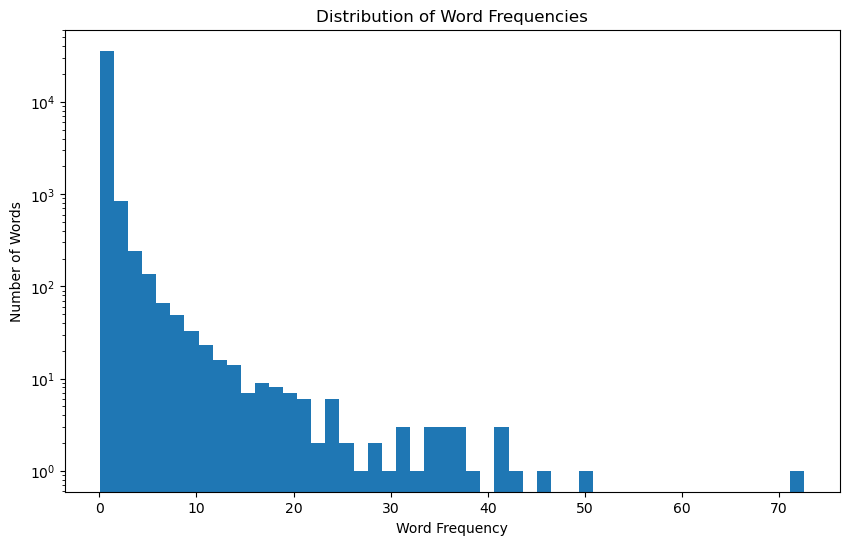

In [16]:
# Sum up the word frequencies
word_frequencies = X_tfidf.sum(axis=0)

# Convert to a list for easier handling
word_frequencies = word_frequencies.tolist()[0]

# Step 2: Visualize the Distribution
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, log=True)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.show()

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

### Training the model using Multinomial Naive Bayes classifier

In the context of classifying text data, Multinomial Naive Bayes is a commonly used algorithm because it's well-suited for dealing with discrete features, which is the case when working with text.

Multinomial Naive Bayes is designed to handle features that represent counts or frequencies, which is a natural representation for text data (e.g., word counts or TF-IDF values).

In [18]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.20, random_state=42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

mnb = MultinomialNB()
naive_model = mnb.fit(X_train,y_train)
y_pred_class = mnb.predict(X_test)

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       990
           1       0.98      1.00      0.99       940

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [20]:
import joblib
joblib.dump(naive_model, 'naive_model.joblib')
joblib.dump(vect, 'CountVectorizer.joblib')
joblib.dump(tfidf_transformer, 'tfidf_transformer.joblib')

['tfidf_transformer.joblib']

In [21]:
model = joblib.load('naive_model.joblib')
vect = joblib.load('CountVectorizer.joblib')
tfidf = joblib.load('tfidf_transformer.joblib')

text1 ="Congratulations! You have won a free vacation. Claim your prize now!"
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text1])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The message is a spam!!!")
else:
    print("The message is not spam")

[1]
The message is a spam!!!


In [22]:
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text2])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The message is a spam!!!")
else:
    print("The message is not spam")

[0]
The message is not spam
